In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [23]:
import pandas as pd
import os
import re
import codecs
from IPython.display import display, Math
from IPython.display import Image as ipImage
from six.moves import cPickle as pickle
import string
from PIL import Image
import numpy as np
import h5py
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [3]:
width = None
pd.options.display.max_rows = 600
pd.options.display.max_columns = width
pd.options.display.max_colwidth = 600
pd.options.display.width = width
pd.options.display.max_seq_items = None
pd.options.display.expand_frame_repr = False
pd.options.display.colheader_justify = 'left'

In [4]:
import data_commons as dtc
import dl_commons as dlc
import viz_commons as vc
from viz_commons import VisualizeDir, DiffParams, VisualizeStep

Using TensorFlow backend.


### Notebook Arguments
----------------------

In [25]:
storedir = '/zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09/test_runs/step_00167526_score89.0_publish/store_2'
clobber = False
dump = False
original_image_dir = '/zpool_3TB/i2l/data/dataset5/formula_images'
predicted_image_dir = os.path.join(storedir, 'eval_images', 'images_pred')
golden_image_dir = os.path.join(storedir, 'eval_images', 'images_gold')

____________________________________

In [6]:
vd = VisualizeDir(os.path.expanduser(storedir))
last_step = vd.view_steps()[1][-1]
print('last_step = %d' % last_step)

Loaded /zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09/test_runs/step_00167526_score89.0_publish/store_2/hyper.pkl and /zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09/test_runs/step_00167526_score89.0_publish/store_2/args.pkl
Loaded ../data/dataset5/training_56/df_train.pkl (114408, 3)
Loaded ../data/dataset5/training_56/df_test.pkl (14280, 3)
Loaded ../data/dataset5/training_56/df_valid.pkl (14280, 3)
num eval_steps = 1
eval_steps = [(167526, 146585)]
all_steps = []
last_step = 167526


In [7]:
print('dumping predictions from step %d' % last_step)
vs = VisualizeStep(vd, 'test', last_step)
df = vs.dump_preds(dump=dump)
df

dumping predictions from step 167526


,ed,image_name,predicted_seq,target_len,target_seq
formula_name,,,,,
8eb596be1210429,0.000000,8eb596be1210429_basic.png,h^{a}(\phi )=\omega ^{ab}\partial _{b}H(\phi ),24,h^{a}(\phi )=\omega ^{ab}\partial _{b}H(\phi )
425391c19cc90e6,0.000000,425391c19cc90e6_basic.png,ds_{4}^{2}=-f(R)\left( 1-\frac {2m}{R}\right) dt^{2}+f^{-1}(R)\left[ \left( 1-\frac {2m}{R}\right) ^{-1}dR^{2}+R^{2}d\Omega _{2}^{2}\right],85,ds_{4}^{2}=-f(R)\left( 1-\frac {2m}{R}\right) dt^{2}+f^{-1}(R)\left[ \left( 1-\frac {2m}{R}\right) ^{-1}dR^{2}+R^{2}d\Omega _{2}^{2}\right]
7a939f28e0fd64a,0.000000,7a939f28e0fd64a_basic.png,"\left( \mu \frac {\partial }{\partial \mu }+\beta ^{(\alpha )}\frac {\partial }{\partial \alpha }-\gamma _{m}\, m\frac {\partial }{\partial m}\right) \, {\cal L}(\alpha ,m;\mu )=0.",58,"\left( \mu \frac {\partial }{\partial \mu }+\beta ^{(\alpha )}\frac {\partial }{\partial \alpha }-\gamma _{m}\, m\frac {\partial }{\partial m}\right) \, {\cal L}(\alpha ,m;\mu )=0."
a03ca65ad0186d6,0.000000,a03ca65ad0186d6_basic.png,W=2w\operatorname {cos}\delta _{0}\operatorname {exp}(i\delta _{0}),29,W=2w\operatorname {cos}\delta _{0}\operatorname {exp}(i\delta _{0})
e4b4876c34c094d,0.000000,e4b4876c34c094d_basic.png,Q\equiv M_{+}-M_{-}=\frac {1}{2\pi }\int dx\partial _{x}\phi,31,Q\equiv M_{+}-M_{-}=\frac {1}{2\pi }\int dx\partial _{x}\phi
72b26b7d712937b,0.000000,72b26b7d712937b_basic.png,\frac {q_{1}^{2}}{\sigma _{3}^{2}}+\frac {q_{2}^{2}}{\sigma _{3}^{2}-\sigma _{2}^{2}}=1,59,\frac {q_{1}^{2}}{\sigma _{3}^{2}}+\frac {q_{2}^{2}}{\sigma _{3}^{2}-\sigma _{2}^{2}}=1
0a7747e7015c151,0.000000,0a7747e7015c151_basic.png,\xi _{Robin}(\kappa )=\xi _{damped}(\kappa /k).,29,\xi _{Robin}(\kappa )=\xi _{damped}(\kappa /k).
43afdc9657030d0,0.000000,43afdc9657030d0_basic.png,\epsilon _{abc}\phi _{b}^{m}\partial _{c}^{m}\Gamma _{i}=0,32,\epsilon _{abc}\phi _{b}^{m}\partial _{c}^{m}\Gamma _{i}=0
385cc082a49793d,0.000000,385cc082a49793d_basic.png,M_{\eta ^{\prime }}^{2}=\frac {2N_{f}}{N_{c}-N_{f}}\left( \frac {12}{11}\right) ^{2}\Lambda ^{2}D\left( N_{c}\right) ^{\frac {1}{N_{c}-N_{f}}}\.,86,M_{\eta ^{\prime }}^{2}=\frac {2N_{f}}{N_{c}-N_{f}}\left( \frac {12}{11}\right) ^{2}\Lambda ^{2}D\left( N_{c}\right) ^{\frac {1}{N_{c}-N_{f}}}\.


In [8]:
df.shape

(14280, 5)

In [16]:
print len(df.image_name.values)
print len(set(df.image_name.values))

14280
14280


In [21]:
for image in df.image_name:
    os.symlink(os.path.join(original_image_dir, image), os.path.join(golden_image_dir, image))

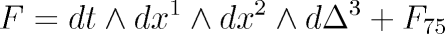

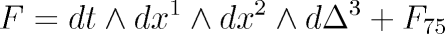

In [30]:
image = '82852ddf4b63ea8_basic.png'
display(ipImage(filename=os.path.join(golden_image_dir, image), unconfined=True))
display(ipImage(filename=os.path.join(predicted_image_dir, image), unconfined=True))